In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import style



### Load the data

In [2]:
training_df = pd.read_json('whats-cooking/train.json')
testing_df = pd.read_json('whats-cooking/test.json')
submission_df = pd.read_csv('whats-cooking/sample_submission.csv')

### Analyse the data

In [3]:
training_df.shape

(39774, 3)

In [4]:
training_df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
testing_df.shape

(9944, 2)

In [6]:
testing_df.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [7]:
cuisine_counts = training_df['cuisine'].value_counts()
cuisine_counts

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [8]:
# Check for missing values in the dataset
training_df.isnull().values.any()

False

### Visualize the data

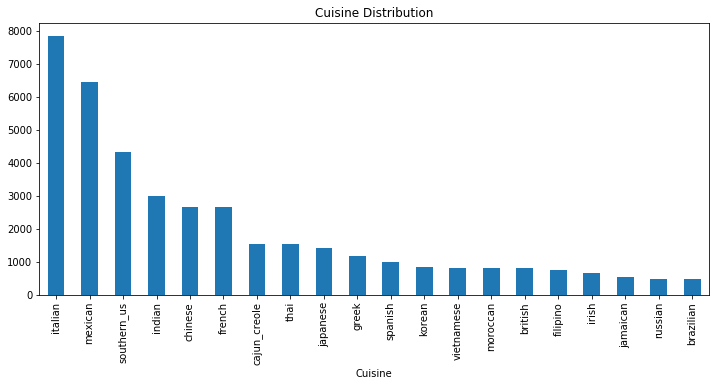

In [9]:
ax = cuisine_counts.plot(kind='bar',
                figsize=(12, 5),
                 title='Cuisine Distribution')
ax.set_xticks(range(len(cuisine_counts)))
ax.set_xlabel("Cuisine")
ax.set_xticklabels(cuisine_counts.index);

In [10]:
ingredients_count = dict()
for ingredients in training_df['ingredients']:
    for ingredient in ingredients:
        if ingredient in ingredients_count:
            ingredients_count[ingredient] = ingredients_count[ingredient] + 1
        else:
            ingredients_count[ingredient] = 1

ingredients_count = pd.DataFrame(ingredients_count.items())
ingredients_count = ingredients_count.sort_values(by=[1], ascending=False)
ingredients_count.shape

(6714, 2)

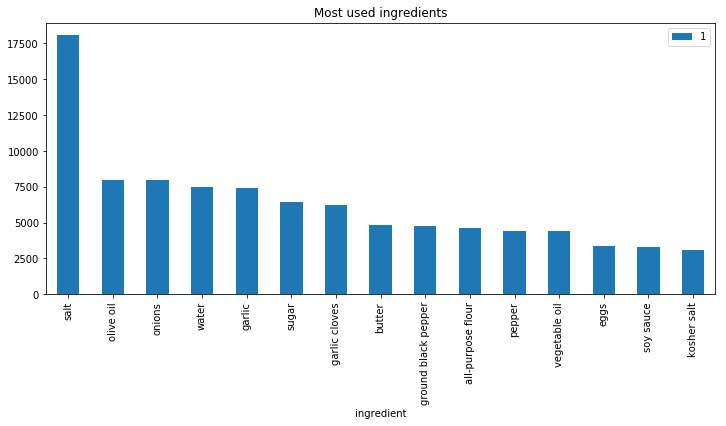

In [11]:
ax = ingredients_count[:15].plot(kind='bar',
                figsize=(12, 5),
                title='Most used ingredients')
ax.set_xticks(range(len(ingredients_count[:15])))
ax.set_xlabel("ingredient")
ax.set_xticklabels(ingredients_count[0][:15]);

In [12]:
grouped_by_cuisines = training_df.groupby('cuisine')
grouped_by_cuisines.get_group('italian').head()

,cuisine,id,ingredients
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-..."
10,italian,5875,"[pimentos, sweet pepper, dried oregano, olive ..."
12,italian,2698,"[Italian parsley leaves, walnuts, hot red pepp..."
14,italian,31908,"[fresh parmesan cheese, butter, all-purpose fl..."


In [13]:
italian_ingredients = dict()
for ingredients in grouped_by_cuisines.get_group('italian').ingredients:
    for ingredient in ingredients:
        if ingredient in italian_ingredients:
            italian_ingredients[ingredient] = italian_ingredients[ingredient] + 1
        else:
            italian_ingredients[ingredient] = 1

italian_ingredients = pd.DataFrame(italian_ingredients.items())
italian_ingredients = italian_ingredients.sort_values(by=[1], ascending=False)

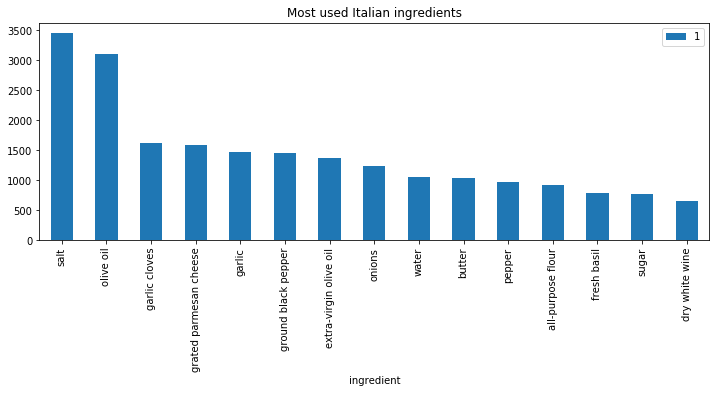

In [14]:
ax = italian_ingredients[:15].plot(kind='bar',
                figsize=(12, 4),
                title='Most used Italian ingredients')
ax.set_xticks(range(len(italian_ingredients[:15])))
ax.set_xlabel("ingredient")
ax.set_xticklabels(italian_ingredients[0][:15]);

In [15]:
mexican_ingredients = dict()
for ingredients in grouped_by_cuisines.get_group('mexican').ingredients:
    for ingredient in ingredients:
        if ingredient in mexican_ingredients:
            mexican_ingredients[ingredient] = mexican_ingredients[ingredient] + 1
        else:
            mexican_ingredients[ingredient] = 1

mexican_ingredients = pd.DataFrame(mexican_ingredients.items())
mexican_ingredients = mexican_ingredients.sort_values(by=[1], ascending=False)

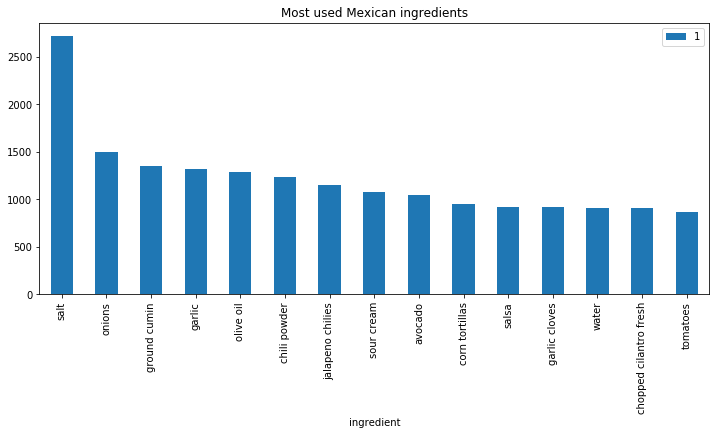

In [16]:
ax = mexican_ingredients[:15].plot(kind='bar',
                figsize=(12, 5),
                title='Most used Mexican ingredients')
ax.set_xticks(range(len(mexican_ingredients[:15])))
ax.set_xlabel("ingredient")
ax.set_xticklabels(mexican_ingredients[0][:15]);

In [17]:
indian_ingredients = dict()
for ingredients in grouped_by_cuisines.get_group('indian').ingredients:
    for ingredient in ingredients:
        if ingredient in indian_ingredients:
            indian_ingredients[ingredient] = indian_ingredients[ingredient] + 1
        else:
            indian_ingredients[ingredient] = 1

indian_ingredients = pd.DataFrame(indian_ingredients.items())
indian_ingredients = indian_ingredients.sort_values(by=[1], ascending=False)

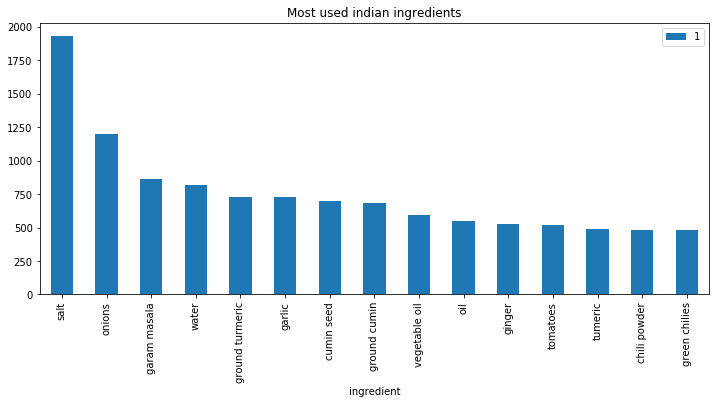

In [18]:
ax = indian_ingredients[:15].plot(kind='bar',
                figsize=(12, 5),
                title='Most used indian ingredients')
ax.set_xticks(range(len(indian_ingredients[:15])))
ax.set_xlabel("ingredient")
ax.set_xticklabels(indian_ingredients[0][:15]);

## Building the model

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
vectorizer = TfidfVectorizer()

y = training_df.cuisine
X = training_df.ingredients.str.join(' ')
X = vectorizer.fit_transform(X)

In [21]:
X_test_data = testing_df.ingredients.str.join(' ')
X_test_data = vectorizer.transform(X_test_data)

In [22]:
split = train_test_split(X, y)
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=0
)

### Linear SVC

In [23]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0)
SVM_model = clf.fit(x_train, y_train)
pred = SVM_model.predict(x_test)

print("LinearSVC accuracy : ",accuracy_score(y_test, pred, normalize = True))

LinearSVC accuracy :  0.7937146448774356


### Naive-Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb_model = gnb.fit(x_train.toarray(), y_train)
pred = gnb_model.predict(x_test.toarray())
print("GaussianNB accuracy : ",accuracy_score(y_test, pred, normalize = True))

GaussianNB accuracy :  0.25204274041483343


### K-NN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

pred = neigh.predict(x_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(y_test, pred))

KNeighbors accuracy score :  0.716781898177247


The Linear SVC model has the highest accuracy score

In [26]:
test_data_prediction = SVM_model.predict(X_test_data)

In [27]:
submission_df = pd.DataFrame(columns=['id', 'cuisine'])
submission_df['id'] = testing_df['id']
submission_df['cuisine'] = test_data_prediction 
submission_df[['id' , 'cuisine' ]].to_csv("whats-cooking.csv", index=False)